In [1]:
# import here ,the data readersfrom pandas library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from collections import Counter 
from sklearn import linear_model
import math  # to perform  mathematical calculations

<h3>Importing the Raw  Data</h3>

In [2]:
#read  file /retrieving the dataset
data = pd.read_excel('empSalary.xlsx')   # Coma Separated Raw Data 
data.head(5)    # Partial view of the total data

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,8169,25,3,1,2,47278.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1956,32,3,1,4,47902.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5601,27,3,1,4,47902.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6781,29,3,2,4,47902.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6171,31,5,1,2,40902.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(500, 13)

In [4]:
data.columns

Index(['Emp_ID ', 'Emp_Age ', 'Expereince ', 'Sex', 'Education_in_Year ',
       'Annual_Rate', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [5]:
data.describe

<bound method NDFrame.describe of      Emp_ID   Emp_Age   Expereince   Sex  Education_in_Year   Annual_Rate  \
0       8169        25            3    1                   2      47278.4   
1       1956        32            3    1                   4      47902.4   
2       5601        27            3    1                   4      47902.4   
3       6781        29            3    2                   4      47902.4   
4       6171        31            5    1                   2      40902.4   
5       7367        33            5    2                   2      44902.4   
6        928        28            6    1                   2      47902.4   
7       3400        37            2    2                   4      48006.4   
8       7573        30            2    2                   4      48672.0   
9       3083        35            2    1                   4      48817.6   
10      8922        30           10    2                   2      48817.6   
11      3659        35           11    1  

In [6]:
data.info() # provides detail information about the data such as the features , target, data types ..whether it is null. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
Emp_ID                500 non-null int64
Emp_Age               500 non-null int64
Expereince            500 non-null int64
Sex                   500 non-null int64
Education_in_Year     500 non-null int64
Annual_Rate           500 non-null float64
Unnamed: 6            0 non-null float64
Unnamed: 7            0 non-null float64
Unnamed: 8            0 non-null float64
Unnamed: 9            0 non-null float64
Unnamed: 10           0 non-null float64
Unnamed: 11           0 non-null float64
Unnamed: 12           1 non-null object
dtypes: float64(7), int64(5), object(1)
memory usage: 50.9+ KB


<h4>Data Wrangling </h4>

In [7]:
# Data need to clean and in good format before applying conducting the anlysis  

In [8]:
data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],axis=1,inplace=True)  # deleting unecessary columns androws

In [9]:
data.head(5)  # data after cleansing 

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate
0,8169,25,3,1,2,47278.4
1,1956,32,3,1,4,47902.4
2,5601,27,3,1,4,47902.4
3,6781,29,3,2,4,47902.4
4,6171,31,5,1,2,40902.4


<h3> Data Exploration</h3>

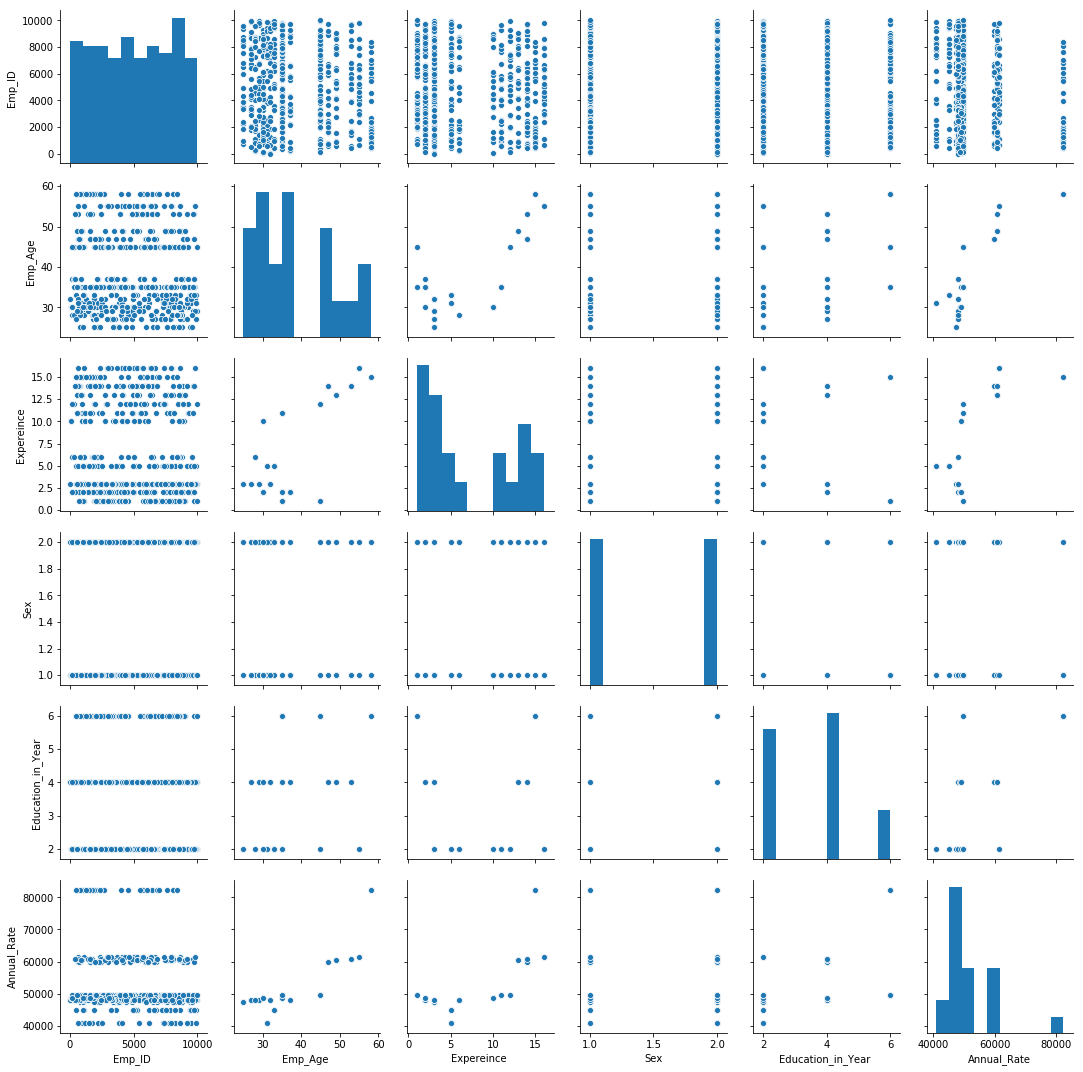

In [10]:
sb.pairplot(data)  # Visualizing the dataset to see if there exist some relationship 

In [20]:
dataCorr = data.corr
dataCorr() 

,Emp_ID,Emp_Age,Expereince,Sex,Education_in_Year,Annual_Rate
Emp_ID,1.000000,-0.046845,-0.053939,0.003008,-0.052567,-0.098914
Emp_Age,-0.046845,1.000000,0.746029,-0.070267,0.331715,0.823357
Expereince,-0.053939,0.746029,1.000000,-0.043901,-0.215284,0.705731
Sex,0.003008,-0.070267,-0.043901,1.000000,-0.002864,-0.019332
Education_in_Year,-0.052567,0.331715,-0.215284,-0.002864,1.000000,0.424159
Annual_Rate,-0.098914,0.823357,0.705731,-0.019332,0.424159,1.000000


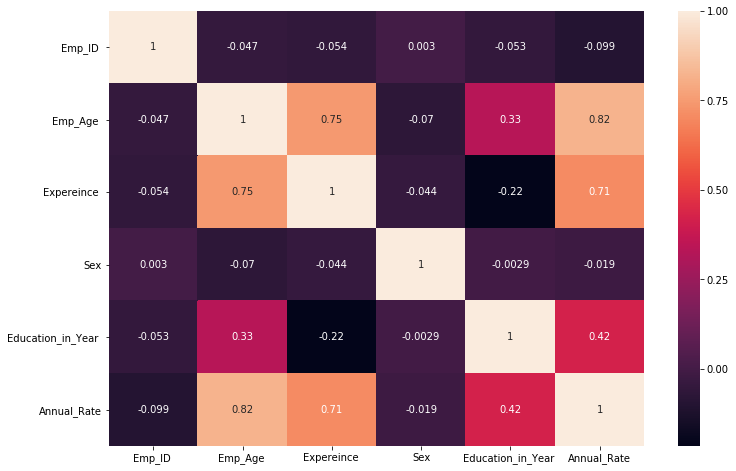

In [21]:
plt.figure(figsize=(12,8))
sb.heatmap(data.corr(),annot=True )
plt.show()                # From the heatmap, strong correlation the light color show strong 
                          # correlation whilit the dark correlation show us the strong negative coorelation.

<h4>Feature Selection</h4>

In [22]:
                     # From  the above , it shows that there is positve relationship between 
                     #Total household income  nnd Total Expenditure

In [34]:
X= data[['Emp_Age ', 'Expereince ', 'Sex', 'Education_in_Year ']]
y= data['Annual_Rate']

In [35]:
y.shape

(500,)

In [36]:
data.columns

Index(['Emp_ID ', 'Emp_Age ', 'Expereince ', 'Sex', 'Education_in_Year ',
       'Annual_Rate'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
X_train.shape

(400, 4)

In [48]:
y_train.shape

(400,)

In [49]:
reg=LinearRegression()
reg.fit(X , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
reg.intercept_

28360.37404959869

In [51]:
reg.coef_

array([2.34169431e-01, 1.40647782e+03, 3.37189730e+02, 3.81161314e+03])

In [52]:
reg.score(X,y)

0.8464323305998818

In [55]:
reg.fit(data[['Emp_Age ', 'Expereince ', 'Sex', 'Education_in_Year ']],data.Annual_Rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
reg.coef_

array([2.34169431e-01, 1.40647782e+03, 3.37189730e+02, 3.81161314e+03])

In [57]:
reg.intercept_

28360.37404959869

In [59]:
reg.predict([[35,6,1,4]])

array([52391.07919311])

In [60]:
reg.score(X,y)   # Model evaluation 

0.8464323305998818